# Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os
import cv2

## I.Build the Model

In [9]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
# Load the pre-trained MobileNetV2 model, excluding the top classification layer
base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
# Freeze the base model
base_model.trainable = False

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
# Create new model on top
inputs = Input(shape=(96, 96, 3))
x = base_model(inputs)
x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)

## II. PreProcess the Data


In [11]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
# Resize images from 32x32 to 96x96 to fit MobileNetV2 input size requirements
train_images_resized = tf.image.resize(train_images, (96, 96))
test_images_resized = tf.image.resize(test_images, (96, 96))

## III. Compile and Train Base Model

In [12]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',
metrics=['accuracy'])


In [13]:
# Train the model
history = model.fit(
train_images_resized, train_labels,
epochs=5,
batch_size = 128,
validation_split=0.3,
)


Epoch 1/5
274/274 [==============================] - 154s 545ms/step - loss: 0.8968 - accuracy: 0.6906 - val_loss: 0.6874 - val_accuracy: 0.7607
Epoch 2/5
274/274 [==============================] - 141s 515ms/step - loss: 0.6283 - accuracy: 0.7817 - val_loss: 0.6178 - val_accuracy: 0.7842
Epoch 3/5
274/274 [==============================] - 128s 467ms/step - loss: 0.5705 - accuracy: 0.8019 - val_loss: 0.6050 - val_accuracy: 0.7899
Epoch 4/5
274/274 [==============================] - 129s 470ms/step - loss: 0.5399 - accuracy: 0.8127 - val_loss: 0.5855 - val_accuracy: 0.7964
Epoch 5/5
274/274 [==============================] - 136s 495ms/step - loss: 0.5153 - accuracy: 0.8211 - val_loss: 0.5769 - val_accuracy: 0.7998


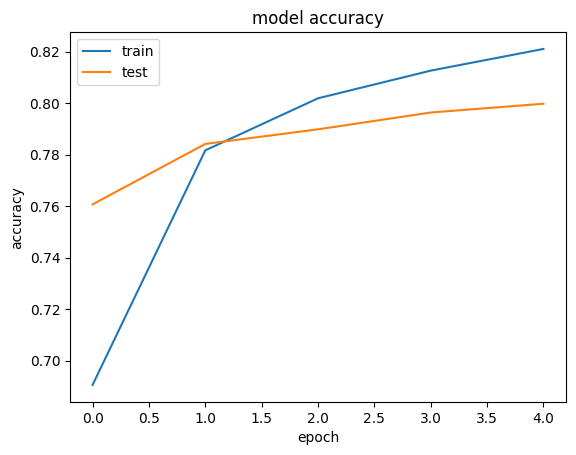

In [14]:
# Visualize Model Training History
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

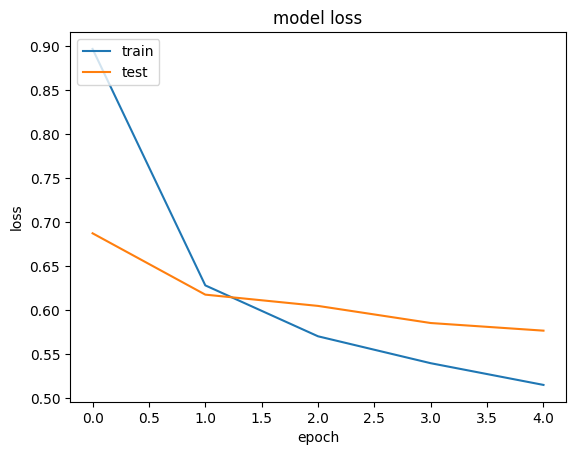

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images_resized, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
predictions = model.predict(test_images_resized)
print(predictions.shape, test_labels.shape)


313/313 [==============================] - 31s 99ms/step - loss: 0.5677 - accuracy: 0.8025
Test Loss: 0.5676717758178711
Test Accuracy: 0.8025000095367432
313/313 [==============================] - 29s 93ms/step
(10000, 10) (10000, 10)


In [ ]:
cm = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
print(cm)

## IV Grid Search

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import itertools
import datetime
from itertools import product


In [18]:
optimizers = ['adam', 'sgd', 'XXX']
activations = ['relu', 'tanh', 'XXX']
batch_sizes = [32, 64, 'XXX']
epochs = [5, 10, 'XXX']

In [23]:
# Grid search
for optimizer, activation, batch_size, epoch in itertools.product(optimizers, activations, batch_sizes, epochs):
# Unique identifier for each model configuration
    run_name = f"optimizer={optimizer}-activation={activation}-batch_size={batch_size}-epoch={epoch}"
    print(f"Training model with {run_name}")
# Set up TensorBoard logging
    log_dir = "logs4/" + run_name + "-" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


Training model with optimizer=adam-activation=relu-batch_size=32-epoch=5
Training model with optimizer=adam-activation=relu-batch_size=32-epoch=10
Training model with optimizer=adam-activation=relu-batch_size=32-epoch=XXX
Training model with optimizer=adam-activation=relu-batch_size=64-epoch=5
Training model with optimizer=adam-activation=relu-batch_size=64-epoch=10
Training model with optimizer=adam-activation=relu-batch_size=64-epoch=XXX
Training model with optimizer=adam-activation=relu-batch_size=XXX-epoch=5
Training model with optimizer=adam-activation=relu-batch_size=XXX-epoch=10
Training model with optimizer=adam-activation=relu-batch_size=XXX-epoch=XXX
Training model with optimizer=adam-activation=tanh-batch_size=32-epoch=5
Training model with optimizer=adam-activation=tanh-batch_size=32-epoch=10
Training model with optimizer=adam-activation=tanh-batch_size=32-epoch=XXX
Training model with optimizer=adam-activation=tanh-batch_size=64-epoch=5
Training model with optimizer=adam-a

In [ ]:
# Define the model creation function
def create_model(optimizer, activation):
    model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation=activation),
    Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
    return model



In [ ]:
def create_model(optimizer, activation):
    inputs = Input(shape=(96, 96, 3))
    x = base_model(inputs)
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(10, activation=activation)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
    return model

In [ ]:
model = create_model(optimizer, activation)
model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size,
validation_split=0.1, callbacks=[tensorboard_callback], verbose=0)

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Finished {run_name} with Accuracy: {accuracy}")
# Instructions to view in TensorBoard
print("To view the TensorBoard logs, run: tensorboard --logdir logs4/")
